# N-dimensional interpolator with the CosmoBolognaLib C++/Python libraries

In this notebook we present a N-dim interpolation code, with which it is possible to interpolate a function in a given N-dim set of points.
The N-dim interpolator is written as a function of the cbl::chainmesh::ChainMesh class of the CosmoBolognaLib libraries (Marulli et al. 2011, (see the full documentation at http://federicomarulli.github.io/CosmoBolognaLib/Doc/html/index.html). A squared/cubic mesh grid is constructed onto the points at which we know the values of the function, then we draw another set of points randomly and interpolate the function at their positions.

## Import the CosmoBolognaLib and the Python packages

In [160]:
import CosmoBolognaLib as cbl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

## Create a 2D uniform distribution of points and a 2D function on them

We choose, for example, a 2D Moffat function $\mathcal{f}(x,y) = \frac{1}{(x-\pi)^2 + (y - \pi)^2}$, where $x$ and $y$ are drawn from a uniform probability distribution (in numpy: np.random.uniform(..)) ranging from $0$ to $2\pi$. 

In [161]:
x = np.random.uniform(0, 2*np.pi, 10000)
y = np.random.uniform(0, 2*np.pi, 10000)

# let's pack x and y into a single matrix of points

points = np.vstack((x,y))

# the number of coordinates we used

N_coords = len(points)

# define the function at the points position

f = [1./(1+(x[ii]-np.pi)**2+(y[ii]-np.pi)**2) for ii in range(0,len(x))]

## Create a squared grid with ChainMesh

The points coordinates are stretched between -100 and 100, in order to have a uniform grid (squared/cubic/..) on which it is possible to search close objects and properly calculate distances between points. It is possible to choose the cell size of the grid. Here we choose cell_size = 10, so the grid will have 20 cells per side.

In [162]:
# select the cell size of the grid
cell_size = 10

# select the maximum searching radius
rMAX = 2

# create the chain mesh grid
chmesh = cbl.ChainMesh(cell_size,N_coords)

# create a squared grid by passing the points and the function defined on themvalue = [0. for ii in range(0, len(b_slope))]
chmesh.norm_grid(points, f, rMAX)

print("done with creating the chain mesh grid")

done with creating the chain mesh grid


## Interpolate the function on another set of points

The interpolation is done by counting close objects found near each points in the grid. The research for close points is done in the cells that falls within a sphere having radius rMAX, and only the closest N_close points are considered. The interpolated values of the function in the new set of points will be the average between the function values of the closest points:

$\mathcal{f}(x) = \frac{\sum_i^{N_{close}} \mathcal{f}_i}{N_{close}}$

The user can freely choose the values for $N_{close}$, here we use $N_{close} = 10$, so the average will be done on the 10 nearest points on the grid.

In [163]:
xx = np.random.uniform(0, 2*np.pi, 2500)
yy = np.random.uniform(0, 2*np.pi, 2500)

# define the interpolation values vector
interp_values = [0. for ii in range(0, len(xx))]


N_close = 10

for ii in range(0, len(xx)):
    
    xi = [xx[ii], yy[ii]]
    
    interp_values[ii] = chmesh.interp_coord(xi, N_close)
    
print("Interpolation done")

Interpolation done


## Show the results of the interpolation

We show the underlying distribution of points with known function's values in a 2D representation, with colors going from dark to light colors representing the function's value. Here the user can freely choose which map between function's values and colors will be used (here we use "viridis" colormap).
The interpolated values are represented with red points in a 3-dimensional plot, with $z$-values equal to the interpolated function's values.

### Define a function to plot the underlying distribution of points and the colorbar

In [184]:
def show_3Dplot(x, y, f, my_cmap, fig, ax):
    
    p = ax.scatter(x,y, [0], marker='.', s=4, c=f, cmap=my_cmap)
    plt.colorbar(p, ax=ax, label="function values", shrink=0.7)
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))
    ax.set_xlabel("$X$", fontsize=14)
    ax.set_ylabel("$Y$", fontsize=14)
    ax.set_zlabel("$\mathcal{f}$", fontsize=16)

### Visualize the results

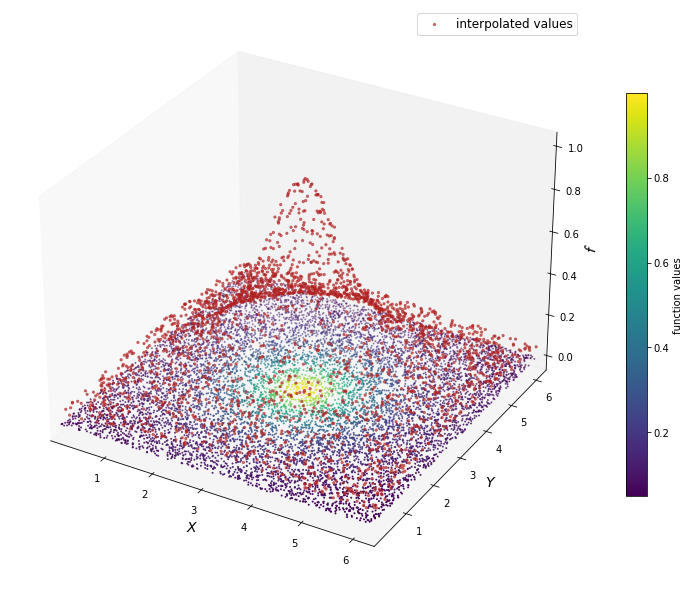

In [185]:
fig = plt.figure(figsize=(12,8))

ax = Axes3D(fig) # for a 3D representation

# show the underlying distribution of points with colors representing the function's values (colorbar)
show_3Dplot(x,y,f, "viridis", fig, ax)

# show the interpolated values in the new set of points
ax.scatter(xx, yy, interp_values, marker='o', s=5,  color='firebrick', alpha=0.6, label='interpolated values')

ax.grid(False)
ax.legend(fontsize=12)

plt.show()

